## Trade data from Census API

In [1]:
import requests
import pandas as pd
import config

import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('bdew', config.plotly_key)

%matplotlib inline

In [2]:
base = 'https://api.census.gov/data/timeseries/intltrade/'
key = config.census_key
param = 'CTY_CODE,CTY_NAME,ALL_VAL_MO'
time = 'from+2016-01'
flow = 'exports'
url = '{}{}/hs?get={}&key={}&time={}'.format(base, flow, param, key, time)

In [175]:
print url

https://api.census.gov/data/timeseries/intltrade/exports/hs?get=CTY_CODE,CTY_NAME,ALL_VAL_MO&key=1649b25fa3485b155557cad03a79127e641ec045&time=from+2016-01


In [3]:
r = requests.get(url).json()

In [170]:
df = pd.DataFrame(r[1:], columns=r[0])#
df = df[(df['CTY_CODE'].str[0] !='0') & (df['CTY_CODE'].str[1] != 'X') & (~df['CTY_NAME'].str.contains('COUNTRIES'))]
df = df.set_index(['CTY_NAME', pd.to_datetime(df['time'])])['ALL_VAL_MO'].astype(long)
df = df.groupby(level=0).diff(12).groupby(level=0).tail(2).unstack()
df2 = df.sort_values(df.keys()[1]).dropna().div(1000000)
df2 = df2.head(10).append(pd.DataFrame(index=['...'])).append(df2.tail(10))
dates = [df2.columns[0].strftime('%b %Y'), df2.columns[1].strftime('%b %Y')]
df2.columns = dates

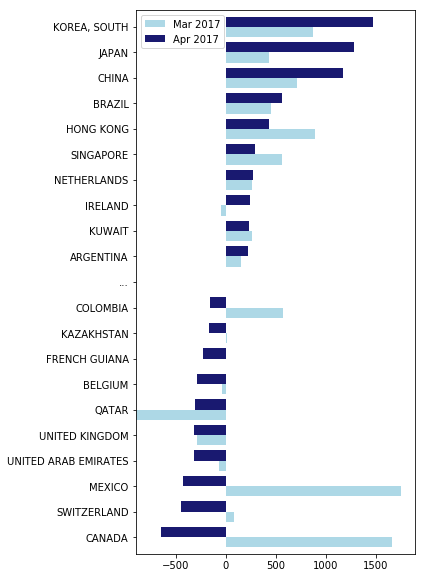

In [171]:
df2.plot(kind='barh', figsize=(5,10), color=['lightblue', 'midnightblue'], width=0.8)

In [174]:
trace1 = {
    "x": df2[dates[0]], 
    "y": df2.index, 
#    "text": [w_list[k]['text'] for k in w_list.keys()], 
    "name": dates[0], 
    "orientation": "h", 
    "type": "bar",
#    "hoverinfo": "text",
    "marker": {
        "color": "rgb(0,191,255)", 
        "line": {
          "color": "rgb(8,48,107)", 
          "width": 0
    }
  }, 
}
trace2 = {
    "x": df2[dates[1]], 
    "y": df2.index, 
#    "text": [w_list[k]['text'] for k in w_list.keys()], 
    "name": dates[1], 
    "orientation": "h", 
    "type": "bar",
#    "hoverinfo": "text",
    "marker": {
        "color": "rgb(31,73,125)", 
        "line": {
          "color": "rgb(8,48,107)", 
          "width": 0
    }
  }, 
}
data = Data([trace1, trace2])
layout = { 
  "autosize": False, 
  "height": 650, 
  "legend": {
    "x": 0.7, 
    "y": 0.35
  }, 
  "margin": {
    "r": 20, 
    "t": 20, 
    "b": 20, 
    "l": 150
  }, 
  "showlegend": True, 
  "title": "", 
  "width": 500, 
  "xaxis": {
    "autorange": True, 
    "range": [-5, 30], 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "type": "category"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='Trade_Dynamics')

In [ ]:
"annotations": [
    {
      "x": -0.65, 
      "y": 1.1432, 
      "align": "left", 
      "font": {"size": 14}, 
      "showarrow": False, 
      "text": "<b>Worker purchasing power growth since January 2000 by industry</b><br><i>Production and non-supervisory employees, percent change, as of April 2017</i>", 
      "xref": "paper", 
      "yref": "paper"
    }, 
    {
      "x": -0.65, 
      "y": -0.1554, 
      "align": "left", 
      "font": {"size": 11}, 
      "showarrow": False, 
      "text": "<a href=\"http://cepr.net>http://cepr.net</a><br>Source: Bureau of Labor Statistics Average Hourly Earnings, adjusted for inflation using CPI-W.", 
      "xref": "paper", 
      "yref": "paper"
    }, 
    {
      "x": 22.2, 
      "y": 9.3, 
      "align": "left", 
      "arrowcolor": "rgba(0, 0, 0, 0)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": True, 
      "text": "24.6%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 17.4, 
      "y": "Professional and Business Services", 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "19.7%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 16.3, 
      "y": 8, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "18.7%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 15.1, 
      "y": 7, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "17.5%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 14.9, 
      "y": 6, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "17.4%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 11.8, 
      "y": 5, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "14.2%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 9.4, 
      "y": 4, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "<b>11.4%</b>", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 5.5, 
      "y": 3, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(255, 255, 255)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "7.5%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 4.3, 
      "y": 2, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 0, 
      "ay": -20, 
      "font": {
        "color": "rgb(60, 60, 60)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "2.5%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 2.1, 
      "y": 1, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 25, 
      "ay": 0, 
      "font": {
        "color": "rgb(60, 60, 60)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "-0.3%", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 1.8, 
      "y": 0, 
      "align": "left", 
      "arrowcolor": "rgb(60, 60, 60)", 
      "arrowhead": 0, 
      "arrowwidth": 1, 
      "ax": 41, 
      "ay": -1, 
      "font": {
        "color": "rgb(60, 60, 60)", 
        "family": "\"Open Sans\", verdana, arial, sans-serif", 
        "size": 12
      }, 
      "showarrow": False, 
      "text": "-0.6%", 
      "xref": "x", 
      "yref": "y"
    }
  ],

In [90]:
d = {}
for cty in ['CANADA', 'MEXICO', 'CHINA', 'BRAZIL', 'JAPAN', 'GERMANY', 'FRANCE']:
    d[cty] = int(df[df['CTY_NAME'] == cty]['ALL_VAL_MO'].item())

In [91]:
df[(df['CTY_CODE'].str[0] !='0') & (df['CTY_CODE'].str[1] != 'X')][1:].sort_values('ALL_VAL_MO', ascending=False)

,CTY_CODE,CTY_NAME,ALL_VAL_MO,time
3,1220,CANADA,2.271282e+10,2017-04
5,2010,MEXICO,1.886355e+10,2017-04
144,5700,CHINA,9.839701e+09,2017-04
150,5880,JAPAN,5.970373e+09,2017-04
58,4120,UNITED KINGDOM,4.720944e+09,2017-04
147,5800,"KOREA, SOUTH",4.429381e+09,2017-04
66,4280,GERMANY,4.179277e+09,2017-04
60,4210,NETHERLANDS,3.742251e+09,2017-04
46,3510,BRAZIL,2.809338e+09,2017-04
65,4279,FRANCE,2.758535e+09,2017-04


In [77]:
exp = pd.DataFrame(d, index=[flow]).T.sort_values(flow)

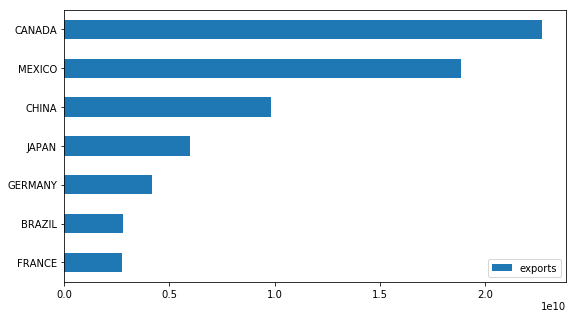

In [80]:
exp.plot(kind='barh', figsize=(9,5))